<a href="https://colab.research.google.com/github/mohansharma077/Machine-Learning-Portfolio-Exercise--Mohan-Sharma/blob/main/Week_6_Ensemble_Learning_with_Spark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This manuscript discusses the application of ensemble learning algorithms on a distributed computing engine entitled, Apache Spark. The authors aim to show that distributed ensemble learning may vastly improve machine learning efficiency, and subsequently decrease time costs when using huge datasets, while still being accurate.

Ensemble Learning and Spark

Ensemble learning is a subfield of machine learning that refers to the aggregation of multiple "weakly supervised models", to provide a single "strongly supervised" model. The goal is in improving model performance in such areas as classification, predictor, and functional estimation. This paper focuses on two broad areas of ensemble learning.


Bagging and Boosting.
Bagging (Bootstrap Aggregating) is a parallel ensemble learning approach that considers individual learners as independent. The paper uses the random forest algorithm to represent Bagging.

Boosting is a sequential ensemble learning algorithm that has strong dependencies between individual learners and generates them one at a time in sequence. The paper uses an "optimal subset algorithm" to represent Boosting.

Spark is a computing engine for large-scale data processing that has a distributed storage abstraction called Resilient Distributed Dataset (RDD). Spark is particularly useful for iterative algorithms (such as machine learning) because it caches the output results of jobs in memory instead of writing ID to disk each time like MapReduce.



Experimental Design and Results

In the study, both Bagging and Boosting used the decision tree as a base learner. The algorithms were tested in both a hosted environment and a distributed environment via Spark RDD. The experiments employed the dataset "Second-hand Car Trading Price Prediction" from China's Aliyun Tianchi platform, altered the working nodes (N) (2, 3, and 4), and three different sizes of datasets (50,000, 100,000, and 150,000).

The primary evaluation measures were:

Runtime. The time taken from job submission to model completion.
Speedup. The ratio of the single runtime to the parallel runtime. Essentially a measure of the efficiency of the parallel algorithm.
F1-score. It is a metric that is a weighted harmonic mean of precision and recall, that accounts for false positives and false negatives for classifying models.

The findings revealed that:

The runtime and speedup of both algorithms had a basically linear correlation as the number of working nodes increase. In other words, as the number of working nodes increased, the runtime decreased and speed up increased.
The F1-score was stable and that was a good indication that distributed algorithms could maintain accuracy similar to the standalone version.
The algorithms were shown to have good scalability to ensure there was confidence they would perform well with larger datasets.

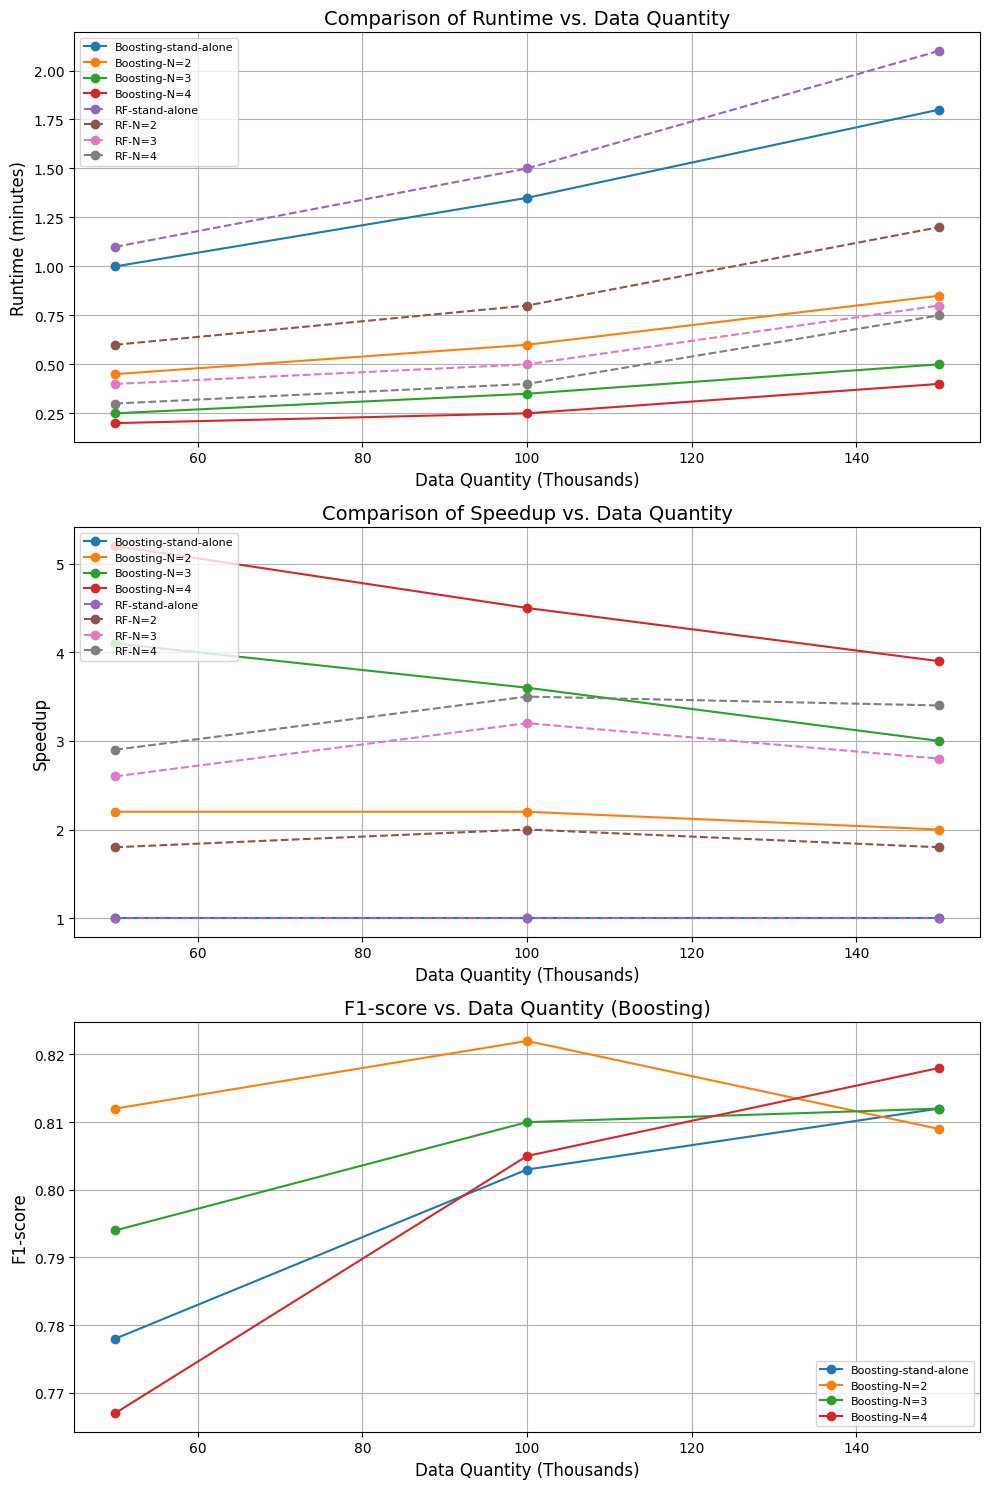

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Data from the PDF, restructured for plotting against dataset size

# Runtime Data
runtime_data = {
    'Data quantity/Thousand': [50, 100, 150],
    'Boosting-stand-alone': [1.0, 1.35, 1.8],
    'Boosting-N=2': [0.45, 0.6, 0.85],
    'Boosting-N=3': [0.25, 0.35, 0.5],
    'Boosting-N=4': [0.2, 0.25, 0.4],
    'RF-stand-alone': [1.1, 1.5, 2.1],
    'RF-N=2': [0.6, 0.8, 1.2],
    'RF-N=3': [0.4, 0.5, 0.8],
    'RF-N=4': [0.3, 0.4, 0.75]
}
runtime_df_new = pd.DataFrame(runtime_data)

# Speedup Data
speedup_data = {
    'Data quantity/Thousand': [50, 100, 150],
    'Boosting-stand-alone': [1.0, 1.0, 1.0],
    'Boosting-N=2': [2.2, 2.2, 2.0],
    'Boosting-N=3': [4.1, 3.6, 3.0],
    'Boosting-N=4': [5.2, 4.5, 3.9],
    'RF-stand-alone': [1.0, 1.0, 1.0],
    'RF-N=2': [1.8, 2.0, 1.8],
    'RF-N=3': [2.6, 3.2, 2.8],
    'RF-N=4': [2.9, 3.5, 3.4]
}
speedup_df_new = pd.DataFrame(speedup_data)

# F1-score Data
f1_score_data = {
    'Data quantity/Thousand': [50, 100, 150],
    'Boosting-stand-alone': [0.778, 0.803, 0.812],
    'Boosting-N=2': [0.812, 0.822, 0.809],
    'Boosting-N=3': [0.794, 0.810, 0.812],
    'Boosting-N=4': [0.767, 0.805, 0.818]
}
f1_score_df_new = pd.DataFrame(f1_score_data)

# Create a figure with three subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Plotting Runtime vs. Data Quantity
for column in runtime_df_new.columns[1:]:
    if 'Boosting' in column:
        linestyle = '-'
    else:
        linestyle = '--'
    axes[0].plot(runtime_df_new['Data quantity/Thousand'], runtime_df_new[column], label=column, marker='o', linestyle=linestyle)
axes[0].set_title('Comparison of Runtime vs. Data Quantity', fontsize=14)
axes[0].set_xlabel('Data Quantity (Thousands)', fontsize=12)
axes[0].set_ylabel('Runtime (minutes)', fontsize=12)
axes[0].legend(loc='upper left', fontsize=8)
axes[0].grid(True)

# Plotting Speedup vs. Data Quantity
for column in speedup_df_new.columns[1:]:
    if 'Boosting' in column:
        linestyle = '-'
    else:
        linestyle = '--'
    axes[1].plot(speedup_df_new['Data quantity/Thousand'], speedup_df_new[column], label=column, marker='o', linestyle=linestyle)
axes[1].set_title('Comparison of Speedup vs. Data Quantity', fontsize=14)
axes[1].set_xlabel('Data Quantity (Thousands)', fontsize=12)
axes[1].set_ylabel('Speedup', fontsize=12)
axes[1].legend(loc='upper left', fontsize=8)
axes[1].grid(True)

# Plotting F1-score vs. Data Quantity
for column in f1_score_df_new.columns[1:]:
    axes[2].plot(f1_score_df_new['Data quantity/Thousand'], f1_score_df_new[column], label=column, marker='o')
axes[2].set_title('F1-score vs. Data Quantity (Boosting)', fontsize=14)
axes[2].set_xlabel('Data Quantity (Thousands)', fontsize=12)
axes[2].set_ylabel('F1-score', fontsize=12)
axes[2].legend(loc='lower right', fontsize=8)
axes[2].grid(True)

plt.tight_layout()
plt.savefig('experimental_results_by_data_quantity.png')



Results Analysis with Data Quantity
The new visualizations present another angle to examine  paper's results and help to illustrate how these performances scale with quantity of data.


Runtime vs. Data Quantity: As they fixed the number of working nodes, the runtime for both the Boosting and RF algorithms increased as data quantity increased. The plots demonstrate that the fixed amount of increased runtime occurs for every increase in data size (from 50k, to 100k, to 150k), and will continue to do so even with a distributed set up.


Speedup vs. Data Quantity: The speedup will generally decrease slightly with the increase in data quantity at fixed number of nodes, particularly for Boosting and the larger number of nodes. This is in line with the further results of the paper, as the data quantity increases, the amount of data per working node for a single node remains constant. Subsequently, the acceleration rate will slow because the working node virtual machine memory has limitations.


F1-score versus Data Quantity: The F1-score from the Boosting algorithm demonstrates that as the sample increases in size, the stability of the score improves, and the values are mostly consistent with the stand-alone experiment. This implies that the accuracy of the model is not adversely affected by a larger dataset and that the distributed algorithm is stable.